# Исследование продаж компьютерных игр

 Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).
    Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
    
<b>Цель исследования :</b>
Выявить определяющие успешность игры закономерности

Ход исследования
Данные о продажах игр- в файле : /datasets/games.csv

О качестве данных ничего не известно. Поэтому перед проверкой гипотез понадобится обзор данных.

Проверим данные на ошибки и оценим их влияние на исследование. Затем, на этапе предобработки поищем возможность исправить самые критичные ошибки данных.

Выполнение исследование включает 5 этапов:

   <b>Обзор данных.

   Предобработка данных.
       
   Исследовательский анализ данных.</b>

    •Самые популярные платформы (топ-5)
    •Анализ количества выпущенных игр за разные годы.
    •Динамика продаж по платформам.
    •Определение актуального периода для построения прогноза на 2017 год.
    •Анализ платформ - лидеров по продажам, потенциальной прибыльности.
    •Влияние на продажи внутри одной популярной платформы отзывов пользователей и критиков.
    •Общее распределение игр по жанрам.
<p><b>Портрет пользователя каждого региона</b>

      • Самые популярные платформы (топ-5). 
      • Самые популярные жанры (топ-5). 
      • Влияние рейтинга ESRB на продажи в отдельном регионе
<b>Проверка гипотез:</b>

       • Средние пользовательские рейтинги платформ Xbox One и PC одинаковые; 
       • Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.


In [366]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns
sns.set()
pd.options.display.float_format = '{:,.2f}'.format
pd.options.display.max_columns = 100

try:
    data = pd.read_csv('/datasets/games.csv')
except:
    data = pd.read_csv('/datasets/games.csv')
display(data.head())




,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,"2,006.00",Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,"1,985.00",Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,"2,008.00",Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,"2,009.00",Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,"1,996.00",Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Подготовка данных

In [367]:
#получчим информацию о данных датафрейма
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [368]:
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,"16,446.00","16,715.00","16,715.00","16,715.00","16,715.00","8,137.00"
mean,"2,006.48",0.26,0.15,0.08,0.05,68.97
std,5.88,0.81,0.50,0.31,0.19,13.94
min,"1,980.00",0.00,0.00,0.00,0.00,13.00
25%,"2,003.00",0.00,0.00,0.00,0.00,60.00
50%,"2,007.00",0.08,0.02,0.00,0.01,71.00
75%,"2,010.00",0.24,0.11,0.04,0.03,79.00
max,"2,016.00",41.36,28.96,10.22,10.57,98.00


In [369]:
#Выведем 20 первых строк для просмотра массива на ошибки
data.head(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,"2,006.00",Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,"1,985.00",Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,"2,008.00",Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,"2,009.00",Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,"1,996.00",Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,"1,989.00",Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,"2,006.00",Platform,11.28,9.14,6.50,2.88,89.00,8.5,E
7,Wii Play,Wii,"2,006.00",Misc,13.96,9.18,2.93,2.84,58.00,6.6,E
8,New Super Mario Bros. Wii,Wii,"2,009.00",Platform,14.44,6.94,4.70,2.24,87.00,8.4,E
9,Duck Hunt,NES,"1,984.00",Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [370]:
#выведем наименования столбцов
data.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [371]:
#приведем столбцы к нижнему регистру
data.columns = map(str.lower, data.columns)

In [372]:
#так-то лучше
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [373]:
#Рассмотрим столбец Name поподробнее 
data['name'].value_counts()

Need for Speed: Most Wanted                                      12
LEGO Marvel Super Heroes                                          9
Ratatouille                                                       9
Madden NFL 07                                                     9
FIFA 14                                                           9
                                                                 ..
Primal                                                            1
Sengoku Basara: Battle Heroes                                     1
Katekyoo Hitman Reborn!! Let's Ansatsu!? Nerawareta 10 Daime!     1
Haunted Casino                                                    1
Strike Witches: Aoi no Dengekisen - Shin Taichou Funtousuru!      1
Name: name, Length: 11559, dtype: int64

Имеются пропущенные значения (незначительно для анализа -2 позиции)

In [374]:
len(data['name'].unique())

11560

Уникальных наименований в столбце 11560 из 16713

In [375]:
data['name'].describe()

count                           16713
unique                          11559
top       Need for Speed: Most Wanted
freq                               12
Name: name, dtype: object

In [376]:
#посмотрим кол-во пропусков в столбце Name
data['name'].isna().sum()

2

In [377]:
#выведем строки с пропущенными значениями по столбцу Name
data.loc[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,"1,993.00",NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,"1,993.00",NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Как видим, пропуски имеются не только в исследуемом столбце, но также по столбцу Genre, critic_score, user_score, rating

In [378]:
#удалим выявленные строки (659,14244) с пропущенными значениями 
data.drop(index = [659, 14244], inplace = True)
data.loc[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [379]:
data['name'].unique()

array(['Wii Sports', 'Super Mario Bros.', 'Mario Kart Wii', ...,
       'Woody Woodpecker in Crazy Castle 5', 'LMA Manager 2007',
       'Haitaka no Psychedelica'], dtype=object)

Исследование столбца Платформа

In [380]:
data['platform'].value_counts()

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
WS         6
SCD        6
3DO        3
TG16       2
PCFX       1
GG         1
Name: platform, dtype: int64

In [381]:
#посчитаем количество уникальных платформ
len(data['platform'].unique())

31

In [382]:
data['platform'].describe()

count     16713
unique       31
top         PS2
freq       2161
Name: platform, dtype: object

По описанию столбца можем заключить: самая популярная консоль PS2, уникальных платформ 31 позиция, пропуском в столбце не имеется - вопросов по столбцу нет.

In [383]:
data['platform'].isna().sum()

0

In [384]:
data['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

Исследуем столбец год выпуска

In [385]:
data['year_of_release'].describe()

count   16,444.00
mean     2,006.49
std          5.88
min      1,980.00
25%      2,003.00
50%      2,007.00
75%      2,010.00
max      2,016.00
Name: year_of_release, dtype: float64

В столбце некорректно использован тип данных, необходимо будет произвести замену на целое число

In [386]:
data['year_of_release'].value_counts()

2,008.00    1427
2,009.00    1426
2,010.00    1255
2,007.00    1197
2,011.00    1136
2,006.00    1006
2,005.00     939
2,002.00     829
2,003.00     775
2,004.00     762
2,012.00     653
2,015.00     606
2,014.00     581
2,013.00     544
2,016.00     502
2,001.00     482
1,998.00     379
2,000.00     350
1,999.00     338
1,997.00     289
1,996.00     263
1,995.00     219
1,994.00     121
1,993.00      60
1,981.00      46
1,992.00      43
1,991.00      41
1,982.00      36
1,986.00      21
1,989.00      17
1,983.00      17
1,987.00      16
1,990.00      16
1,988.00      15
1,984.00      14
1,985.00      14
1,980.00       9
Name: year_of_release, dtype: int64

In [387]:
#выведем датафрейм отсортированный по столбцу год выпуска с пропущенными значениями
data.loc[data['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.00,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.00,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.00,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.00,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.00,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.00,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Количество пропущенных строк по данному признаку 263 строки, что составляет 1,6%

In [388]:
#удалим из датасета строки с пропусками по столбцу Год выпуска
#выведем срез по пропущенным строкам столбца Год выпска(для проверки)
data.dropna(subset=['year_of_release'], inplace = True)
data.query('year_of_release.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [389]:
#заменим тип данных по столбцу
data['year_of_release'] = data['year_of_release'].astype(int)

In [390]:
#проверим замену данных, выведя первые пять строк 
data['year_of_release'].head()

0    2006
1    1985
2    2008
3    2009
4    1996
Name: year_of_release, dtype: int64

Исследуем столбец Жанр

In [391]:
data['genre'].value_counts()

Action          3307
Sports          2306
Misc            1721
Role-Playing    1481
Shooter         1296
Adventure       1293
Racing          1226
Platform         878
Simulation       857
Fighting         837
Strategy         673
Puzzle           569
Name: genre, dtype: int64

In [393]:
#выведем уникальные значения по столбцу
data['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

Уникальных значений по столбцу 12, самый популярный жанр - Action

In [394]:
data['genre'].isna().sum()

0

Исследуем столбец Продажи в Северной Америке, Европе и Японии, а также продажи в других странах

In [395]:
data['na_sales'].value_counts()

0.00     4449
0.02      562
0.03      554
0.04      543
0.05      536
         ... 
14.44       1
13.96       1
2.35        1
2.96        1
4.40        1
Name: na_sales, Length: 401, dtype: int64

In [396]:
data['na_sales'].describe()

count   16,444.00
mean         0.26
std          0.82
min          0.00
25%          0.00
50%          0.08
75%          0.24
max         41.36
Name: na_sales, dtype: float64

In [397]:
data['eu_sales'].value_counts()

0.00    5766
0.01    1467
0.02    1290
0.03     911
0.04     702
        ... 
9.14       1
1.92       1
3.86       1
2.59       1
3.87       1
Name: eu_sales, Length: 307, dtype: int64

In [398]:
data['eu_sales'].describe()

count   16,444.00
mean         0.15
std          0.51
min          0.00
25%          0.00
50%          0.02
75%          0.11
max         28.96
Name: eu_sales, dtype: float64

In [399]:
data['jp_sales'].value_counts()

0.00    10300
0.02      733
0.01      697
0.03      540
0.04      391
        ...  
3.84        1
1.17        1
3.03        1
2.66        1
1.71        1
Name: jp_sales, Length: 244, dtype: int64

In [400]:
data['jp_sales'].describe()

count   16,444.00
mean         0.08
std          0.31
min          0.00
25%          0.00
50%          0.00
75%          0.04
max         10.22
Name: jp_sales, dtype: float64

In [401]:
data['other_sales'].value_counts()

0.00    6492
0.01    3398
0.02    1596
0.03     910
0.04     641
        ... 
0.72       1
2.11       1
0.96       1
1.48       1
3.96       1
Name: other_sales, Length: 155, dtype: int64

In [402]:
data['other_sales'].describe()

count   16,444.00
mean         0.05
std          0.19
min          0.00
25%          0.00
50%          0.01
75%          0.03
max         10.57
Name: other_sales, dtype: float64

Изучим столбец Оценка критиков и Оценка пользователей

In [403]:
data['critic_score'].value_counts()

70.00    252
71.00    248
75.00    240
80.00    235
73.00    234
        ... 
29.00      3
20.00      3
13.00      1
17.00      1
21.00      1
Name: critic_score, Length: 81, dtype: int64

In [404]:
data['critic_score'].describe()

count   7,983.00
mean       68.99
std        13.92
min        13.00
25%        60.00
50%        71.00
75%        79.00
max        98.00
Name: critic_score, dtype: float64

In [405]:
#посмотрим количество пропусков по столбцу, ранее при выводе информации ненулевых значений данного столбца составляло 
#Critic_Score     8137 non-null   float64
data['critic_score'].isna().sum()

8461

In [406]:
data['critic_score'] = data['critic_score'].astype('Int64')

Заполнять по аналогии с годом выпуска будет некорректно, так как оценки на разных платформах могут отличаться.
Варианты с медианой также не подходят, слишком много пропусков.

In [407]:
data['user_score'].value_counts()

tbd    2376
7.8     322
8       285
8.2     276
8.3     252
       ... 
1.3       2
0.3       2
1.9       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

In [408]:
data['user_score'].describe()

count     9839
unique      96
top        tbd
freq      2376
Name: user_score, dtype: object

In [409]:
#начение tbd не означает наличие оценки пользователя,
#заменим ее на пропуск (nan), пропуски оставим незаполненными, чтобы впоследствии не исказить
data.loc[data['user_score'] == 'tbd', 'user_score'] = float('nan')
data.query('user_score.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,<NA>,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,<NA>,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,<NA>,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,<NA>,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,<NA>,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,<NA>,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,<NA>,NaN,NaN


In [410]:
data['user_score'].isna().sum()

8981

In [411]:
data['rating'].value_counts()

E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
RP         1
AO         1
Name: rating, dtype: int64

In [412]:
data['rating']=data['rating'].replace(['K-A'], 'E')

In [413]:
data['rating'].value_counts()

E       3924
T       2905
M       1536
E10+    1393
EC         8
RP         1
AO         1
Name: rating, dtype: int64

In [414]:
data['user_score'] = data['user_score'].astype('float64')

In [415]:
data['rating'].describe()

count     9768
unique       7
top          E
freq      3924
Name: rating, dtype: object

In [416]:
data['rating'].isna().sum()

6676

Посчитаем количество пропусков от всего датасета:
<p>
  Оценка критиков -50,6%
<p>
  Оценка пользователей - 39,5%
<p>
  Рейтинг от организации ESRB - 39,95%

In [417]:
#сделаем срез по строкам содержащим пропуски в столбцах 
data.query('critic_score.isnull() and user_score.isnull() and rating.isnull()').sort_values(by = 'name')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
14983,Beyblade Burst,3DS,2016,Role-Playing,0.00,0.00,0.03,0.00,<NA>,NaN,NaN
1079,Fire Emblem Fates,3DS,2015,Role-Playing,0.81,0.23,0.52,0.11,<NA>,NaN,NaN
3862,Frozen: Olaf's Quest,DS,2013,Platform,0.21,0.26,0.00,0.04,<NA>,NaN,NaN
3358,Frozen: Olaf's Quest,3DS,2013,Platform,0.27,0.27,0.00,0.05,<NA>,NaN,NaN
13794,Haikyu!! Cross Team Match!,3DS,2016,Adventure,0.00,0.00,0.04,0.00,<NA>,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
12960,Zyuden Sentai Kyoryuger: Game de Gaburincho!!,3DS,2013,Action,0.00,0.00,0.05,0.00,<NA>,NaN,NaN
16389,ef - a fairy tale of the two.,PS2,2010,Adventure,0.00,0.00,0.01,0.00,<NA>,NaN,NaN
12190,everGirl,GBA,2005,Adventure,0.05,0.02,0.00,0.00,<NA>,NaN,NaN
16511,th!nk Logic Trainer,Wii,2009,Puzzle,0.01,0.00,0.00,0.00,<NA>,NaN,NaN


Всего по трем столбцам 6534 строк с пропущенными значениями 

In [418]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   Int64  
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: Int64(1), float64(5), int64(1), object(4)
memory usage: 1.5+ MB


In [419]:
data.duplicated().sum()

0

Посчитаем суммарные продажи по всем регионам 

In [420]:
data['sales_all']= data['na_sales']+data['eu_sales']+data['jp_sales']+data['other_sales']
data['sales_all'].head(10)

0   82.54
1   40.24
2   35.52
3   32.77
4   31.38
5   30.26
6   29.80
7   28.91
8   28.32
9   28.31
Name: sales_all, dtype: float64

In [421]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_all
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.00,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.30,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.00,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,NaN,31.38


<b>Вывод</b>
<p>
Произвела замену столбцов к нижнему регистру.<br> 
Преобразовала типы данны столбцов year_of_release и critic_score.<br> 
Удалены две строки с пропущенными наименованиями по столбцу name.<br> 
Знчаения user_score, равные 'tbd' (To Be Determined)   изменено на пропуски значений. <br> 
Добавлен и почитан новый столбце sales_all с суммой продаж по всем регионам.<br> 
    

### Исследовательсский анализ данных

In [422]:
#Сгруппируем количество игр по годам
games_year = data.groupby('year_of_release')['name'].agg('count').reset_index()
games_year.columns = ['year_of_release', 'count_of_games']
games_year

,year_of_release,count_of_games
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14
5,1985,14
6,1986,21
7,1987,16
8,1988,15
9,1989,17


[Text(0.5, 0, 'год релиза'), Text(0, 0.5, 'количество игр')]

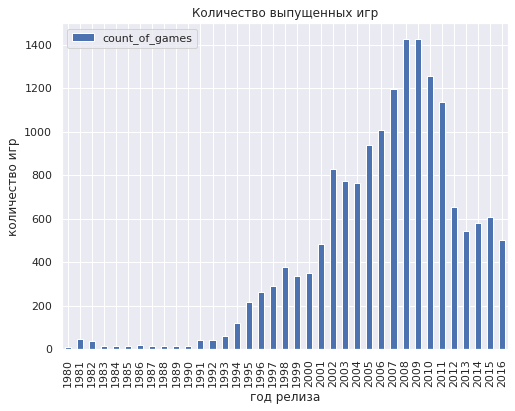

In [423]:
games_year.plot.bar( x = 'year_of_release', y = 'count_of_games', grid=True, title='Количество выпущенных игр',
                   figsize=(8,6)).set(xlabel='год релиза', ylabel='количество игр')

Судя по гистограмме пик количества выпущенных игр приходится 2008-2009 гг. 

In [424]:
#Сгруппируем данные по общим продажам по платформам
platform_sales = data.groupby('platform')['sales_all'].agg(['count', 'sum']).sort_values(by='sum', ascending = False).reset_index()
platform_sales.columns = ['platform', 'game_of_platform_count', 'game_of_platform_sales' ]
platform_sales

,platform,game_of_platform_count,game_of_platform_sales
0,PS2,2127,"1,233.56"
1,X360,1232,961.24
2,PS3,1306,931.34
3,Wii,1286,891.18
4,DS,2121,802.78
5,PS,1190,727.58
6,PS4,392,314.14
7,GBA,811,312.88
8,PSP,1193,289.53
9,3DS,512,257.81


In [425]:
sorted_platform_sales=platform_sales.sort_values(by='game_of_platform_sales',ascending=False)
sorted_platform_sales.head(13)

,platform,game_of_platform_count,game_of_platform_sales
0,PS2,2127,"1,233.56"
1,X360,1232,961.24
2,PS3,1306,931.34
3,Wii,1286,891.18
4,DS,2121,802.78
5,PS,1190,727.58
6,PS4,392,314.14
7,GBA,811,312.88
8,PSP,1193,289.53
9,3DS,512,257.81


Абсолютным лидером по продаж, а также по кол-во выпущенных игр является PS2, далее X360 и PS3

[Text(0.5, 0, 'платформа'), Text(0, 0.5, 'объем продаж')]

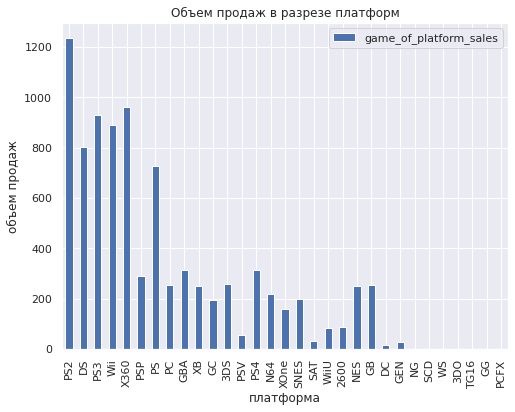

In [426]:
#количество проданных игр в разрезе платформ
platform_sales.sort_values(by =  'game_of_platform_count', ascending= False).plot.bar(
                    x = 'platform', y = 'game_of_platform_sales', grid=True, 
                    title='Объем продаж в разрезе платформ',
                    figsize=(8,6)).set(xlabel='платформа', ylabel='объем продаж')


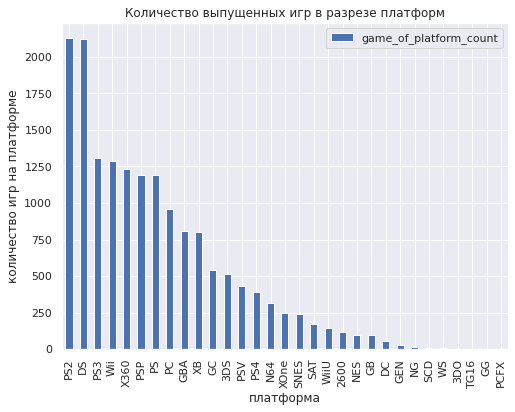

In [427]:
#количество игр на платформах
platform_sales.sort_values(by =  'game_of_platform_count', ascending= False).plot.bar(
                    x = 'platform', y = 'game_of_platform_count', grid=True, 
                    title='Количество выпущенных игр в разрезе платформ',
                    figsize=(8,6)).set(xlabel='платформа', ylabel='количество игр на платформе');

Основываясь на двух гистограммах можно заключить: PS2 лидер по кол-ву выпущенных игр, а также по объему проданных копий. DS намного уступает в объеме продаж, но имеет практический равный уровень произведенных игр в сравнении с PS2

<AxesSubplot:title={'center':'Объемы продаж игровых платформ'}, ylabel='game_of_platform_sales'>

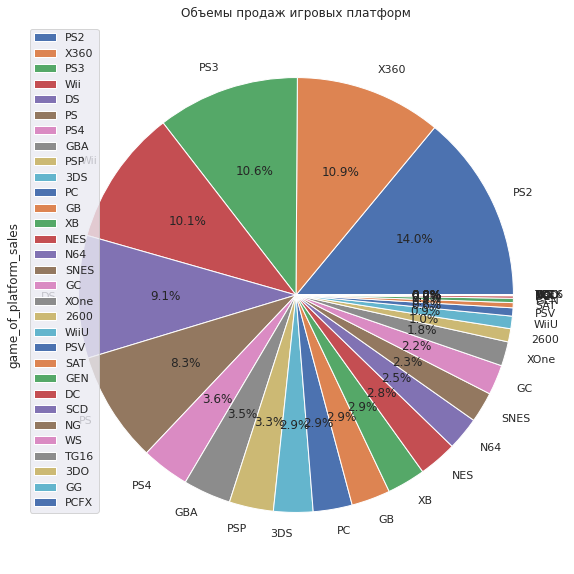

In [428]:
platform_sales.plot(kind = 'pie', y ='game_of_platform_sales', autopct='%1.1f%%', figsize= (10,10),
                         title = 'Объемы продаж игровых платформ', labels = platform_sales['platform'])

Очень наглядный "пирог", который делят платформы в процентном соотношении. По-моему все довольно наглядно

In [429]:
# топ-5 по объемам продаж:
top_platforms = platform_sales.head(5)['platform']
top_platforms

0     PS2
1    X360
2     PS3
3     Wii
4      DS
Name: platform, dtype: object

In [430]:
top = data.query('platform in @top_platforms').pivot_table(
                       index='year_of_release', columns = 'platform', 
                       values = 'sales_all', aggfunc = 'sum')
top


platform,DS,PS2,PS3,Wii,X360
year_of_release,,,,,
1985,0.02,NaN,NaN,NaN,NaN
2000,NaN,39.17,NaN,NaN,NaN
2001,NaN,166.43,NaN,NaN,NaN
2002,NaN,205.38,NaN,NaN,NaN
2003,NaN,184.31,NaN,NaN,NaN
2004,17.27,211.81,NaN,NaN,NaN
2005,130.14,160.66,NaN,NaN,8.25
2006,119.81,103.42,20.96,137.15,51.62
2007,146.94,75.99,73.19,152.77,95.41


(2000.0, 2016.0)

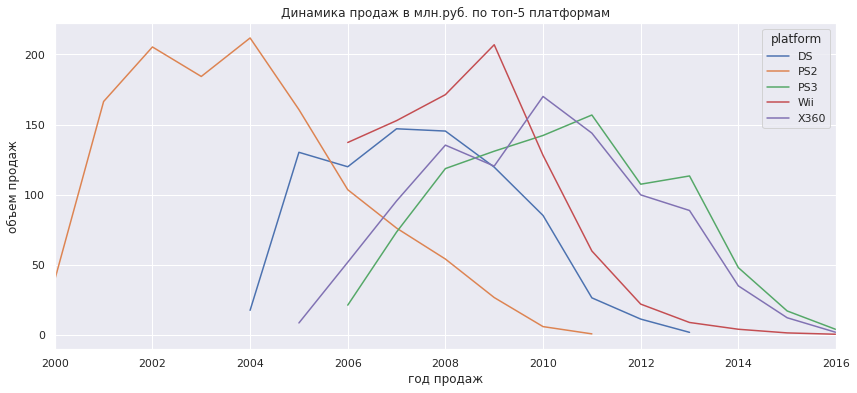

In [431]:
top.plot(grid=True, figsize=(14, 6), title = 'Динамика продаж в млн.руб. по топ-5 платформам').set(
                                     xlabel = 'год продаж', ylabel = 'объем продаж');
plt.xlim(2000, 2016)

In [432]:
top.describe()

platform,DS,PS2,PS3,Wii,X360
count,11.00,12.00,11.00,11.00,12.00
mean,72.98,102.80,84.67,81.02,80.10
std,61.67,79.41,54.64,79.14,57.48
min,0.02,0.45,3.60,0.18,1.52
25%,14.14,35.98,34.36,6.17,29.04
50%,85.02,89.70,107.36,59.65,92.00
75%,124.98,170.90,124.73,144.96,124.03
max,146.94,211.81,156.78,206.97,170.03


[Text(0.5, 0, 'год релиза'), Text(0, 0.5, 'объем продаж, млн.копий')]

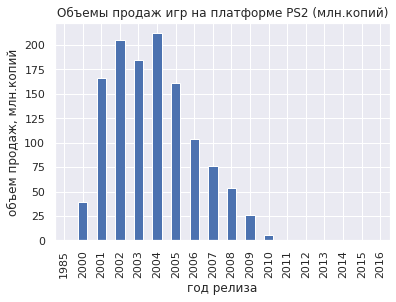

In [433]:
top['PS2'].plot.bar(
                    x = 'year_of_release', y = 'total_sales', grid=True, 
                    title='Объемы продаж игр на платформе PS2 (млн.копий)'
                    ).set(xlabel='год релиза', ylabel='объем продаж, млн.копий')

In [434]:
top['PS2'].describe()

count    12.00
mean    102.80
std      79.41
min       0.45
25%      35.98
50%      89.70
75%     170.90
max     211.81
Name: PS2, dtype: float64

PS2 абслютный лидер по продаж среди остальный платформ. Объемы продаж были очень существенными уже после года выпуска платформы. Самый пик продаж пришелся 2004 год и составил 211,81 млн проданных копий. Период продаваемости платформы приходится на 2000-2010 гг

[Text(0.5, 0, 'год релиза'), Text(0, 0.5, 'объем продаж, млн.копий')]

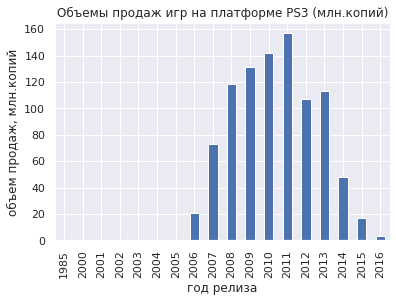

In [435]:
top['PS3'].plot.bar(
                    x = 'year_of_release', y = 'total_sales', grid=True, 
                    title='Объемы продаж игр на платформе PS3 (млн.копий)'
                    ).set(xlabel='год релиза', ylabel='объем продаж, млн.копий')

In [436]:
top['PS3'].describe()

count    11.00
mean     84.67
std      54.64
min       3.60
25%      34.36
50%     107.36
75%     124.73
max     156.78
Name: PS3, dtype: float64

Третье место у платформы PS3. Пик продаж -2011 год, период продаваемоссти 2006-2016.

[Text(0.5, 0, 'год релиза'), Text(0, 0.5, 'объем продаж, млн.копий')]

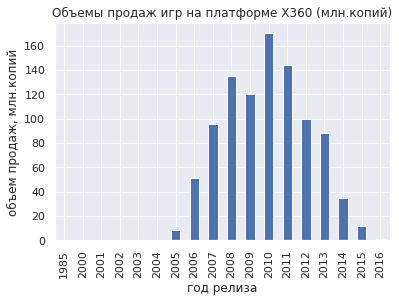

In [437]:
top['X360'].plot.bar(
                    x = 'year_of_release', y = 'total_sales', grid=True, 
                    title='Объемы продаж игр на платформе X360 (млн.копий)'
                    ).set(xlabel='год релиза', ylabel='объем продаж, млн.копий')

In [438]:
top['X360'].describe()

count    12.00
mean     80.10
std      57.48
min       1.52
25%      29.04
50%      92.00
75%     124.03
max     170.03
Name: X360, dtype: float64

Второе место у платформы X360. Пик продаж пришелся на 2010 год - 170,03 млн. копий. Период продаваемости платформы: 2005-2015 гг.

[Text(0.5, 0, 'год релиза'), Text(0, 0.5, 'объем продаж, млн.копий')]

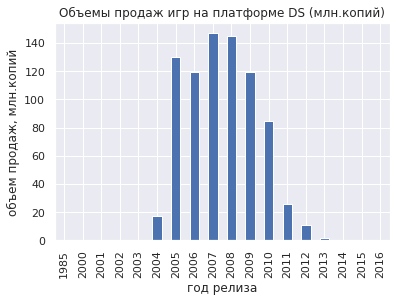

In [439]:
top['DS'].plot.bar(
                    x = 'year_of_release', y = 'total_sales', grid=True, 
                    title='Объемы продаж игр на платформе DS (млн.копий)'
                    ).set(xlabel='год релиза', ylabel='объем продаж, млн.копий')

In [440]:
top['DS'].describe()

count    11.00
mean     72.98
std      61.67
min       0.02
25%      14.14
50%      85.02
75%     124.98
max     146.94
Name: DS, dtype: float64

Заключает топ платформа DS. Пик продаж - 146,94 млн. копий в 2007 году. Период продаваемости 2004-2013 гг.

[Text(0.5, 0, 'год релиза'), Text(0, 0.5, 'объем продаж, млн.копий')]

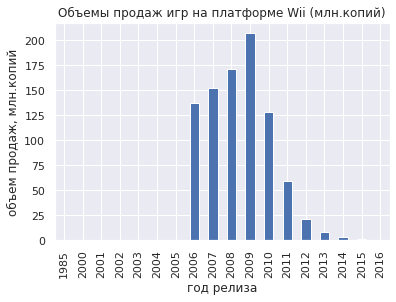

In [441]:
top['Wii'].plot.bar(
                    x = 'year_of_release', y = 'total_sales', grid=True, 
                    title='Объемы продаж игр на платформе Wii (млн.копий)'
                    ).set(xlabel='год релиза', ylabel='объем продаж, млн.копий')

In [442]:
top['Wii'].describe()

count    11.00
mean     81.02
std      79.14
min       0.18
25%       6.17
50%      59.65
75%     144.96
max     206.97
Name: Wii, dtype: float64

Четвертое место у платформы Wii. Пик продаж в 2009 году составил  206,97 млн копий. Период проддаваемости 2006-2014 гг.

По проанализированным данным можно заключить, что средний период  жизни платформы составляет 11,5 лет. Также можно отметить закономерность- резкий всплеск продаж через год (или в первый год), 5-летний пик, и спад, растянутый на 4-5 лет.

<b>Определение актуального периода для построения прогноза на 2017 год.</b>

In [443]:
#суммарные продажи в год 
report = data.groupby(['platform', 'year_of_release']).agg({'sales_all':'sum'}).reset_index()
print('Среднее время жизни платформы', report.groupby('platform').agg({'year_of_release':'nunique'}).mean())


Среднее время жизни платформы year_of_release   7.68
dtype: float64


Исходя из полученного среднего срока жизни платформы в 7 лет, установим актуальным периодом 2013-2016 годы и сохраним данные за эти годы в отдельной переменной data_actual:

In [444]:
data_actual = data.query('year_of_release >= 2013')
data_actual.head()


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_all
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.20,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.10,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,<NA>,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,<NA>,NaN,NaN,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.30,M,12.62


In [445]:
data_actual.sort_values(by='sales_all', ascending=False).head(30)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_all
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.20,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.10,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,<NA>,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,<NA>,NaN,NaN,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.30,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,<NA>,NaN,NaN,11.68
60,Call of Duty: Ghosts,X360,2013,Shooter,6.73,2.56,0.04,0.91,73,2.60,M,10.24
69,Call of Duty: Ghosts,PS3,2013,Shooter,4.10,3.63,0.38,1.25,71,2.60,M,9.36
72,Minecraft,X360,2013,Misc,5.70,2.65,0.02,0.81,<NA>,NaN,NaN,9.18
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.30,E,8.58


In [446]:
#хочу посмотреть выбрать игры с продажами sales_all больше 8 млн. копий, 
#посотмрим что выйдет.8 млн. взяла ориентировочную цифру из таблицы выше, чтобы понять какие игры выбрать для анализа 
data_actual.query('sales_all>8.00')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_all
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.20,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.10,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,<NA>,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,<NA>,NaN,NaN,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.30,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,<NA>,NaN,NaN,11.68
60,Call of Duty: Ghosts,X360,2013,Shooter,6.73,2.56,0.04,0.91,73,2.60,M,10.24
69,Call of Duty: Ghosts,PS3,2013,Shooter,4.10,3.63,0.38,1.25,71,2.60,M,9.36
72,Minecraft,X360,2013,Misc,5.70,2.65,0.02,0.81,<NA>,NaN,NaN,9.18
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.30,E,8.58


In [447]:
#теперь отсортируем по оъему проданных копий
platform_actual= data_actual.groupby('platform')['sales_all'].sum()
platform_actual

platform
3DS    143.25
DS       1.54
PC      39.43
PS3    181.43
PS4    314.14
PSP      3.50
PSV     32.99
Wii     13.66
WiiU    64.63
X360   136.80
XOne   159.32
Name: sales_all, dtype: float64

In [448]:
#данные выше отсортируем в порядке убывания
platform_actual=platform_actual.sort_values(ascending=False)
platform_actual

platform
PS4    314.14
PS3    181.43
XOne   159.32
3DS    143.25
X360   136.80
WiiU    64.63
PC      39.43
PSV     32.99
Wii     13.66
PSP      3.50
DS       1.54
Name: sales_all, dtype: float64

Ну что можно сказать, возьму для анализа PS4, 3DS, XOne, PC, WiiU. Не взяла для анализа хэдлайнеров, тк уже делала их оценку в топах :)

<b>Анализ прибыльности платформ</b>

In [449]:
data_actual = data.query('platform in ["PS4", "3DS", "XOne", "PC", "WiiU"] and year_of_release > 2013') 
data_actual

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_all
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,<NA>,NaN,NaN,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.30,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,<NA>,NaN,NaN,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.30,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,<NA>,NaN,NaN,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
16660,Prison Architect,XOne,2016,Action,0.01,0.00,0.00,0.00,74,6.70,NaN,0.01
16668,Fujiko F. Fujio Characters: Great Assembly! Sl...,3DS,2014,Action,0.00,0.00,0.01,0.00,<NA>,NaN,NaN,0.01
16672,Metal Gear Solid V: The Definitive Experience,XOne,2016,Action,0.01,0.00,0.00,0.00,<NA>,NaN,M,0.01
16677,Aikatsu Stars! My Special Appeal,3DS,2016,Action,0.00,0.00,0.01,0.00,<NA>,NaN,NaN,0.01


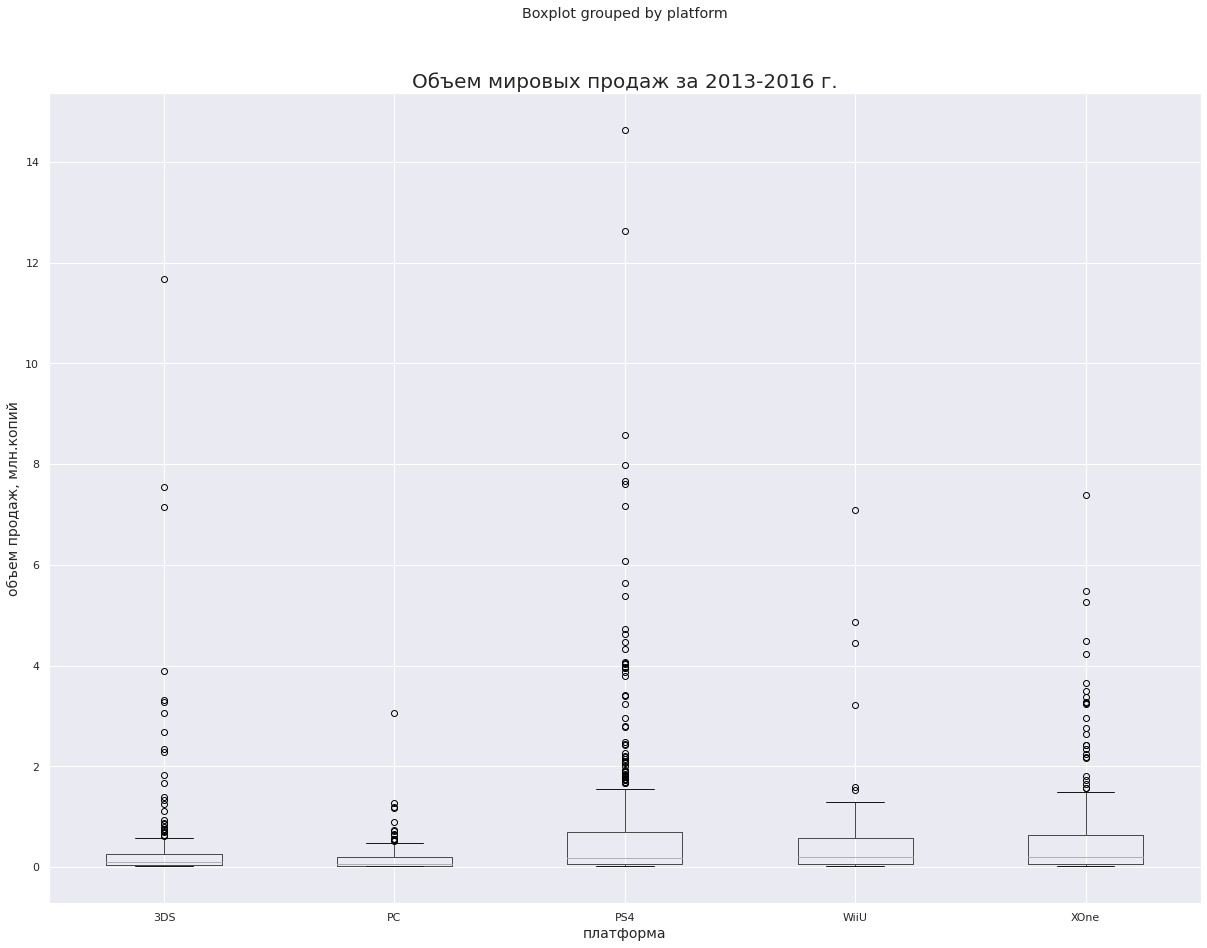

In [450]:
#диаграмма разброса по актуальным платформам 
#список платформ:
actual_platform = ["PS4", "3DS", "XOne", "PC", "WiiU"]

#применим к базе актуального периода фильтр с актуальными платформами:
data_actual.query('platform in @actual_platform').boxplot(
                column='sales_all', by='platform', figsize=(20, 15))
plt.title('Объем мировых продаж за 2013-2016 г.', size=20)
plt.xlabel('платформа', size=14)
plt.ylabel('объем продаж, млн.копий', size=14)
plt.show()

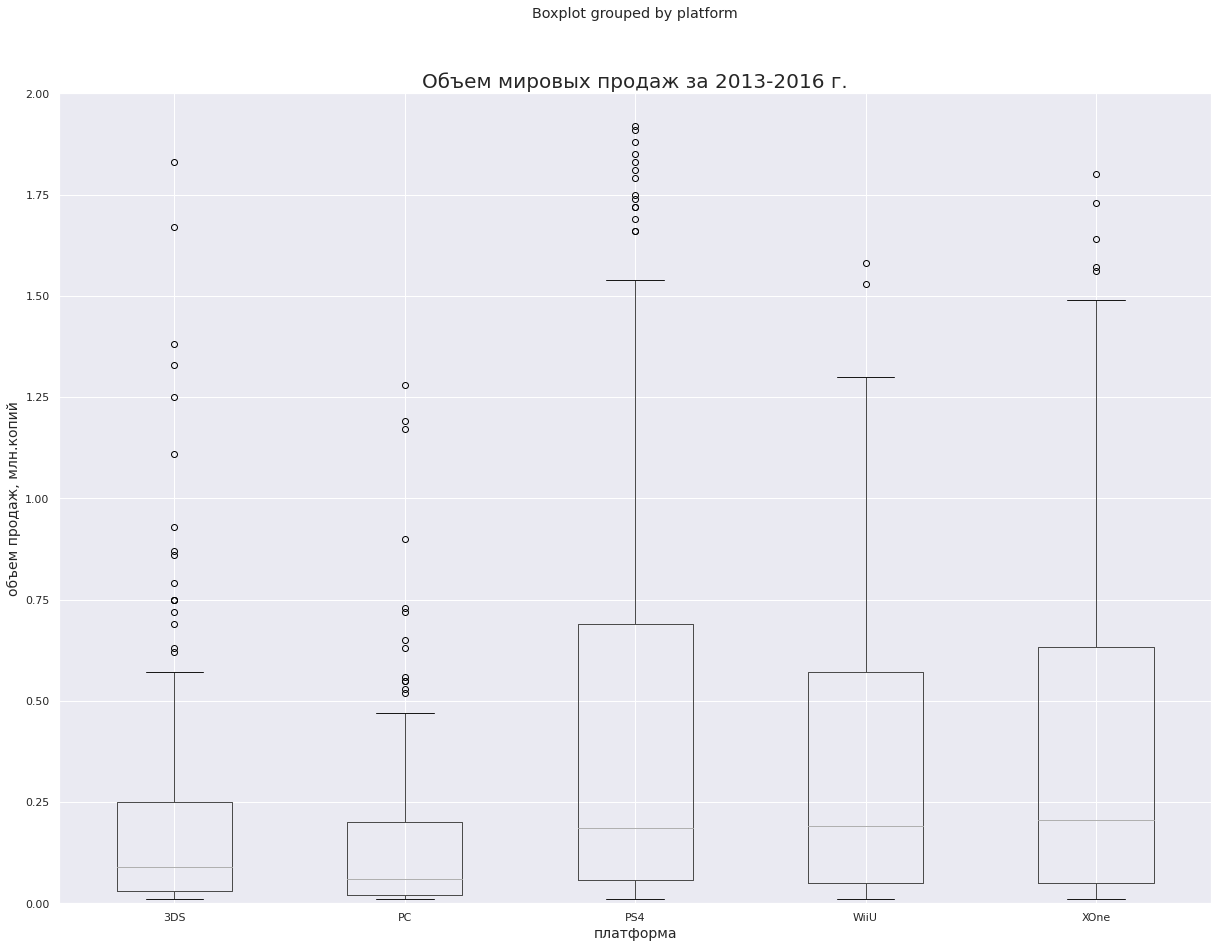

In [451]:
#рассмотрим поближе область ящика:
data_actual.query('platform in @actual_platform').boxplot(
                column='sales_all', by='platform', figsize=(20, 15)).set(ylim=(0,2))
plt.title('Объем мировых продаж за 2013-2016 г.', size=20)
plt.xlabel('платформа', size=14)
plt.ylabel('объем продаж, млн.копий', size=14)
plt.show()

Боксплот показывает распределение продаж между платформами в 2013-2016 годы. Мы видим, что самое большое медианное значение и длинный "верхний" хвост -у WiiU, PS4, XOne - их продажи достигали в лучшее время свыше 20 млн копий. Но чтобы определить, какая платформа на перспективу подходит нам больше всего, посмотрим на общую динамику продаж в разрезе лет.

Сгруппируем данные по годам и платформам, и сразу отсечем тех, кто уже не продается на рынке в 2016 году (используем список actual_platform):

На графике проанализируем, в какой стадии находится каждая платформа и на какие обратить внимание.

In [452]:
data_actual_pivot = data_actual.query('platform in @actual_platform').pivot_table(
                       index='year_of_release', columns = 'platform', 
                       values = 'sales_all', aggfunc = 'sum')
data_actual_pivot

platform,3DS,PC,PS4,WiiU,XOne
year_of_release,,,,,
2014,43.76,13.28,100.00,22.03,54.07
2015,27.78,8.52,118.90,16.35,60.14
2016,15.14,5.25,69.25,4.60,26.15


[Text(0.5, 0, 'год продаж'), Text(0, 0.5, 'объем продаж, млн.копий')]

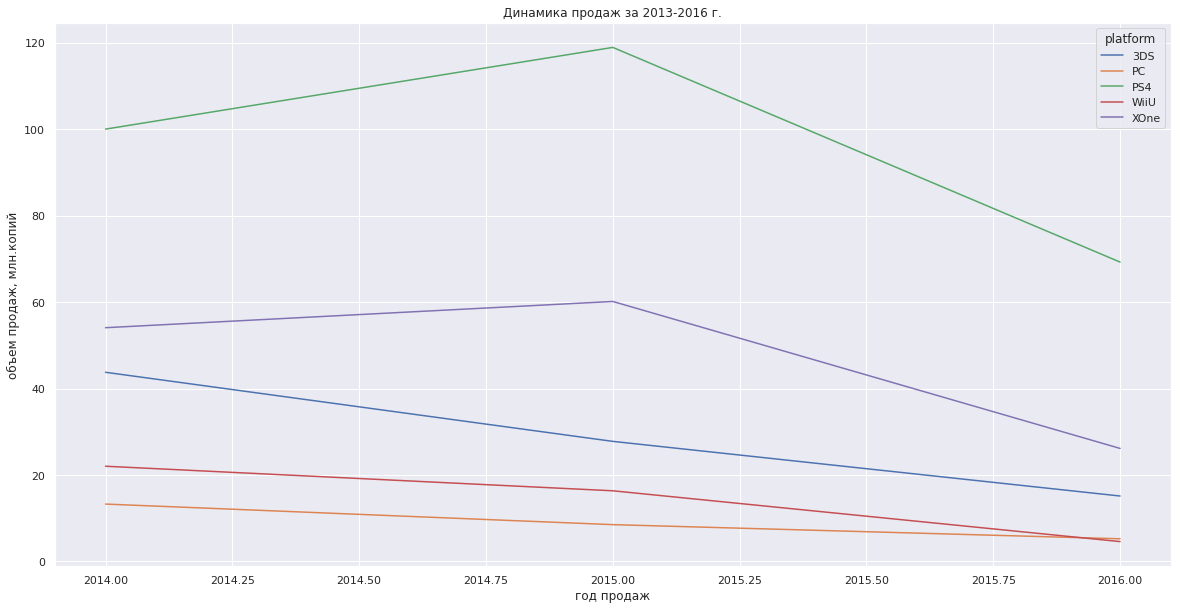

In [453]:
data_actual_pivot.plot(grid=True, figsize=(20, 10), title = 'Динамика продаж за 2013-2016 г.').set(
                                     xlabel = 'год продаж', ylabel = 'объем продаж, млн.копий')

In [454]:
data_actual_pivot.describe()

platform,3DS,PC,PS4,WiiU,XOne
count,3.00,3.00,3.00,3.00,3.00
mean,28.89,9.02,96.05,14.33,46.79
std,14.34,4.04,25.06,8.89,18.13
min,15.14,5.25,69.25,4.60,26.15
25%,21.46,6.88,84.62,10.48,40.11
50%,27.78,8.52,100.00,16.35,54.07
75%,35.77,10.90,109.45,19.19,57.11
max,43.76,13.28,118.90,22.03,60.14


Ранее я комментировала, что возьму обзор платформ не учавствовавших в топ5 обзоре.На конец 2016 у всех платформ наблюдается спад объемов проданных копий. Очень интересно наблюдать за поведением графика по PC, компьютерные игры практически стабильны на всем промежутке исследования.

<b> Влияние отзывов критиков и пользователей на продажи внутри одной популярной платформы</b>

In [455]:
# Рассмотрим влияние оценок критиков и пользователе на примере платформы PS4
ps4_user = data.query('platform == "PS4"')
ps4_critic = data.query('platform == "PS4"')

In [456]:
 from matplotlib.axes._axes import _log as matplotlib_axes_logger
 matplotlib_axes_logger.setLevel('ERROR')

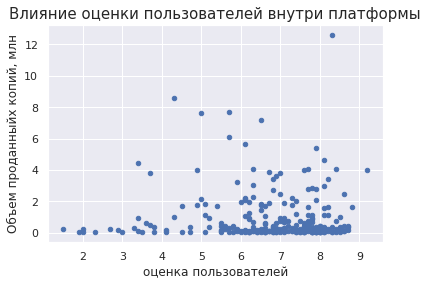

In [457]:
ps4_user.plot(x='user_score', y='sales_all', kind='scatter')
plt.title('Влияние оценки пользователей внутри платформы', size=15)
plt.xlabel('оценка пользователей', size=12)
plt.ylabel('Объем проданныйх копий, млн', size=12)
plt.show()

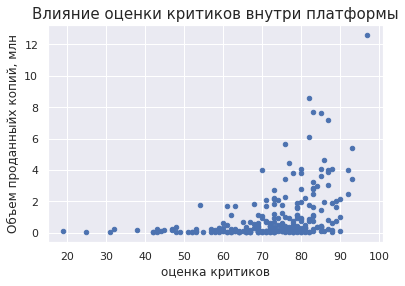

In [458]:
ps4_critic.plot(x='critic_score', y='sales_all', kind='scatter')
plt.title('Влияние оценки критиков внутри платформы', size=15)
plt.xlabel('оценка критиков', size=12)
plt.ylabel('Объем проданныйх копий, млн', size=12)
plt.show()

Как видим из двух графиков рассеяния оценки влияют на объемы проданных копий. Но важно отметить, что оценки критиков имеют больший вес по сравнению с оценками пользователей.Также можно отметить на графике пользователей значительное число выбросов.


In [459]:
data_actual.query('platform == "PS4"').pivot_table(index=['name'], values=['critic_score',
                                                                   'user_score',
                                                                   'sales_all'],
                                           ).corr().loc[:, 'sales_all']

critic_score    0.40
sales_all       1.00
user_score     -0.04
Name: sales_all, dtype: float64

Как видно по графикам распределения и по таблице корреляции, пользовательские отзывы совсем не влияют на продажу, а вот отзывы критиков значительно влияют на продажи.

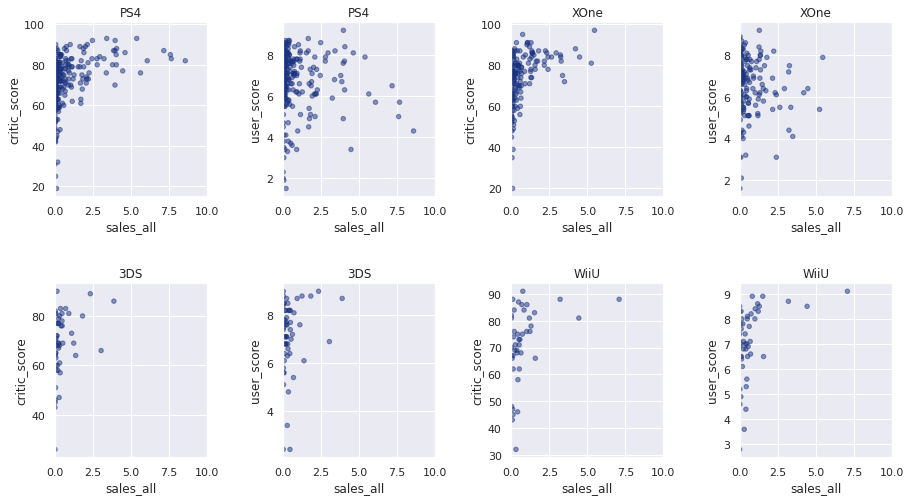

In [460]:
actual_platform = ['PS4', 'XOne', '3DS', 'WiiU']
fig = plt.figure(figsize = (15,8))
fig.subplots_adjust(wspace=0.5, hspace = 0.5)
с=0

for i in actual_platform:
    data_2 = data_actual.query('platform == @i')
    с+=1
    sub = fig.add_subplot(2,4,с)
    st = data_2.plot(x='sales_all', y='critic_score', kind='scatter', alpha=0.5,
                   ax=sub, c= np.repeat(np.atleast_2d(np.array([0.1, 0.2, 0.5])), len(data_2), axis = 0))
    с+=1
    sub = fig.add_subplot(2,4,с)
    ax = data_2.plot(x='sales_all', y='user_score', kind='scatter', alpha=0.5,
                   ax=sub, c= np.repeat(np.atleast_2d(np.array([0.1, 0.2, 0.5])), len(data_2), axis = 0))
    st.set_xlim(0,10)
    st.set_title(i)
    ax.set_xlim(0,10)
    ax.set_title(i)
    
plt.show()

<b>Распределение игр по жанрам </b>

In [461]:
data_actual_genre=data_actual.groupby('genre')['sales_all'].sum().sort_values(ascending=False)
data_actual_genre

genre
Action         160.07
Shooter        144.47
Role-Playing    85.95
Sports          76.76
Racing          24.78
Fighting        23.98
Misc            23.00
Platform        16.95
Simulation      12.28
Adventure       11.15
Strategy         3.72
Puzzle           2.11
Name: sales_all, dtype: float64

По полученному анализу имеется топ-3 жанра по высокой прибыльности с большим отрывом от остальных жанров:Action, Shooter, Role-Playing. Явные аутсайдеры - Strategy, Puzzle.

[Text(0.5, 0, 'год релиза'), Text(0, 0.5, 'объем продаж, млн.копий')]

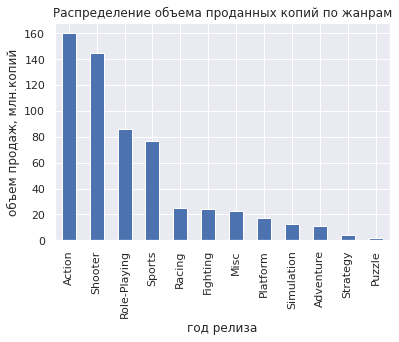

In [462]:
data_actual_genre.plot.bar(
                    x = 'genre', y = 'sales_all', grid=True, 
                    title='Распределение объема проданных копий по жанрам'
                    ).set(xlabel='год релиза', ylabel='объем продаж, млн.копий')

Для наглядности изобразим на графике зависимость объема продаж от жанра игры

In [480]:
data_action = data.query('genre  == "Action"& year_of_release>2013')  
data_action

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_all
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.30,M,12.62
165,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,97,7.90,M,5.47
225,The Last of Us,PS4,2014,Action,1.88,2.00,0.07,0.77,<NA>,NaN,NaN,4.72
231,Uncharted: The Nathan Drake Collection,PS4,2015,Action,2.07,1.71,0.08,0.76,86,8.10,T,4.62
295,Watch Dogs,PS4,2014,Action,1.40,1.90,0.11,0.64,80,6.30,M,4.05
...,...,...,...,...,...,...,...,...,...,...,...,...
16680,Kyoukai no Shirayuki,PSV,2016,Action,0.00,0.00,0.01,0.00,<NA>,NaN,NaN,0.01
16691,Dynasty Warriors: Eiketsuden,PS3,2016,Action,0.00,0.00,0.01,0.00,<NA>,NaN,NaN,0.01
16692,Metal Gear Solid V: Ground Zeroes,PC,2014,Action,0.00,0.01,0.00,0.00,80,7.60,M,0.01
16699,The Longest 5 Minutes,PSV,2016,Action,0.00,0.00,0.01,0.00,<NA>,NaN,NaN,0.01


In [481]:
data_action['sales_all'].describe()

count   619.00
mean      0.32
std       0.80
min       0.01
25%       0.03
50%       0.09
75%       0.28
max      12.62
Name: sales_all, dtype: float64

In [482]:
data_shooter = data.query('genre  == "Shooter"& year_of_release>2013')  
data_shooter

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_all
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,<NA>,NaN,NaN,14.63
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,<NA>,NaN,NaN,7.98
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83,5.70,M,7.66
99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,<NA>,NaN,NaN,7.39
154,Destiny,PS4,2014,Shooter,2.49,2.07,0.16,0.92,76,6.10,T,5.64
...,...,...,...,...,...,...,...,...,...,...,...,...
15273,Call of Duty: Modern Warfare Trilogy,PS3,2016,Shooter,0.01,0.01,0.00,0.00,<NA>,7.00,M,0.02
15359,Touhou Genso Rondo: Bullet Ballet,PS4,2016,Shooter,0.02,0.00,0.00,0.00,55,4.70,E10+,0.02
15467,Resident Evil 4 HD,XOne,2016,Shooter,0.02,0.00,0.00,0.00,<NA>,NaN,NaN,0.02
15841,Cabela's Big Game Hunter: Pro Hunts,WiiU,2014,Shooter,0.02,0.00,0.00,0.00,<NA>,NaN,T,0.02


In [483]:
data_shooter['sales_all'].describe()

count   128.00
mean      1.34
std       2.05
min       0.01
25%       0.17
50%       0.52
75%       1.62
max      14.63
Name: sales_all, dtype: float64

In [484]:
data_role = data.query('genre  == "Role-Playing"& year_of_release>2013')  
data_role

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_all
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,<NA>,NaN,NaN,11.68
105,Fallout 4,PS4,2015,Role-Playing,2.53,3.27,0.24,1.13,87,6.50,M,7.17
108,Pokemon Sun/Moon,3DS,2016,Role-Playing,2.98,1.45,2.26,0.45,<NA>,NaN,NaN,7.14
270,Fallout 4,XOne,2015,Role-Playing,2.51,1.32,0.01,0.38,88,6.20,M,4.22
303,The Witcher 3: Wild Hunt,PS4,2015,Role-Playing,1.02,2.13,0.23,0.59,92,9.20,M,3.97
...,...,...,...,...,...,...,...,...,...,...,...,...
15934,New Interpretation Stranger of Sword City,PSV,2016,Role-Playing,0.00,0.00,0.02,0.00,<NA>,NaN,NaN,0.02
16158,Raven's Cry,PS4,2015,Role-Playing,0.00,0.01,0.00,0.00,<NA>,NaN,NaN,0.01
16201,The Technomancer,PC,2016,Role-Playing,0.00,0.01,0.00,0.00,56,6.80,M,0.01
16376,Dragon Quest X: All in One Package,WiiU,2015,Role-Playing,0.00,0.00,0.01,0.00,<NA>,NaN,NaN,0.01


In [485]:
data_role['sales_all'].describe()

count   221.00
mean      0.46
std       1.18
min       0.01
25%       0.05
50%       0.11
75%       0.36
max      11.68
Name: sales_all, dtype: float64

 Посмотрела данные в разрезе медианы и среднего ариф. по ранее сформировавшимся лидерам <p>
Что могу сказать, по общим продажа лидирует жанр Экшн, но если делать анализ по медиане и среднему ариф. то на первое место выходит жанр Шутер (медиана = 0,52; среднее 1,34), Экшн (медиана = 0,09, среднее = 0,32)

## Продажи по регионам

Исследуем популярные платформы по регионам. Выведем топ-5 по каждому региону.

In [ ]:
#Топ-5 рынок Северной америки 
data.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5)

In [ ]:
#Топ-5 рынок Европы 
data.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5)

In [ ]:
#Топ-5 рынок Японии 
data.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5)

Тут я поняла, что не совсем правильно интерпретировала задание, сравнивать необходимо было ранее выделенные в топ -5 платформы. Но данный анализ в разрезе всего датафрейма по каждому региону оставлю. Занимательно.

In [ ]:
actual_platform = ['PS4', 'XOne', '3DS', 'WiiU']
regions = {'na_sales': 'Северная Америка', 'eu_sales':'Европа', 'jp_sales':'Япония'}

for name in regions:
    data_actual.query('platform in @actual_platform').pivot_table(index='platform', values = name, aggfunc = 'sum').sum(
                                     axis = 1).sort_values(ascending=False).head(5).plot(kind='bar',
                                     title=f'Топ-4 платформ {regions[name]} ').set(
                                     xlabel='Платформа', ylabel='продажи, млн.копий');
    plt.show()


Рынок Северной Америки и Европы впринципе идентичен. Имеется существеная разница с рынком Японии, Нинтендо вышла раньше PS4 на 3 года, этим обусловлена разница в продажах.

Исследуем популярные жанры по регионам. Выведем топ-5 по каждому региону.


In [ ]:
for name in regions:
    data_actual.query('platform in @actual_platform').pivot_table(index='genre', values = name, aggfunc = 'sum').sum(
                                     axis = 1).sort_values(ascending=False).head(5).plot(kind='bar',
                                     title=f'Топ-5 жанров продаж {regions[name]} ').set(
                                     xlabel='Жанр', ylabel='продажи, млн.копий');
    plt.show()

В Северной Америке лидирует жанр Shooter, в Европе - Action, в Японии - Role-Playing.

In [ ]:
(
    data_actual.pivot_table(index='rating', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='mean')
    .sort_values(by='na_sales')
    .plot(kind='bar', figsize=(20, 5))
)
plt.xlabel('Рейтинг ESRB')
plt.ylabel('Количество проданных копий, млн')
plt.title('Продажи в зависимости от рейтинга в различных регионах')
plt.show()

Топ самых продаваемых категорий в Америке и Европе совпадает. Больше всего продаются игры с рейтингом "для взрослых (старше 16 лет)". Следом идут игры для всех - игры, которые имеют самую широкую аудиторию, могут быть интересны как детям, так и взрослым, затем игры для школьников и подростков.Рейтинг ESRB предназначен для рецензирования игр на территории Северной Америки (США, Канады, Мексики). Поэтому в Японии так популярны игры вовсе без этого рейтинга - судя по всему, это игры, созданные в Японии и не получавшие рейтинга, но популярные на своей родине.

<b>Гипотезы</b>

Сформулируем гипотезы:

Н0: средние пользовательские рейтинги платформ Xbox One и PC равны
<p>
Н1: средние пользовательские рейтинги платформ Xbox One и PC не равны

In [489]:
from scipy import stats as st

<b>Гипотеза 1 </b>

In [491]:
xone_rating = data_actual.query('platform == "XOne" and user_score >= 0')['user_score']
pc_rating = data_actual.query('platform == "PC" and user_score >= 0')['user_score']
results = st.ttest_ind(xone_rating, pc_rating)
results.pvalue

0.10450507919348415

Мы не можем отвергнуть нулевую гипотезу, значит средние пользовательские рейтинги платформ одинаковые. Проверим это, рассчитав средние значения.

In [493]:
pc_rating.mean()

6.298360655737705

In [492]:
xone_rating.mean()

6.594545454545456

Очень близки. Подтверждаем гипотезу. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

<b>Гипотеза 2 </b>

H0 Средние пользовательские рейтинги жанров Action и Sports одинаковые.<p>
H1 Средние пользовательские рейтинги жанров Action и Sports различаются.

In [495]:
action_rating = data_actual.query('genre == "Action" and user_score >= 0')['user_score']
sports_rating = data_actual.query('genre == "Sports" and user_score >= 0')['user_score']
results = st.ttest_ind(action_rating, sports_rating)
results.pvalue

1.7837163435600726e-09

Отвергаем нулевую гипотезу. Однако исходная гипотеза - альтернативная, значит ее мы подтверждаем. Средние пользовательские рейтинги жанров Action и Sports разные.

### ВЫВОД

Согласно проанализированным данным рынок видеоигр переживает спад продаж с 2009 года. Могу предположить, что связь спада продаж на рынке видеоигр связана с экономическим кризисом 2008-2010 гг.  Цикл жизни платформы составляет в среднем 11-11,5 лет.  

Также по исследованным данным удалось проследить закономерность: резкий всплекс продаж (через год) 5-летний пик и спад на протяжении 4 лет. Самыми популярными жанрами остаются Action и Shoother. <br>В разрезе продаж по регионам самым прибыльным регионом является Северная Америка, далее Европа и замыкает тройку Япония.  <br>
Предпочтения в рассматриваемых регионах также различаются: в Северной Америке предпочитают Шутеры, в Европе жанр Экшн, так как у Японии самобытная культура и предпочтения в данном регионе рдеют к ролевым играм. <br>По платформам: <br>лидеры по всем годам одназначно семейство PS, <br>большие продажи имела X360, <br>DS(3DS). <br>Также отмечу, PC - компьютерные игры явялются как бы константой в семействе платформ, пользователи могут терять интерес к разным платформам, но любилели именно компьютерных игр будут всегда:) <br>По оценкам игр: Оценки критиков как выяснилось имеют большее влияние на продажи нежели оценки пользователей. <br>На успешность игры, ее продажи влияют следующие факторы: платформа, жанр, регион продаж (нужно учесть предпочтения).